In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file using the provided link
data_url = 'https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(data_url)


In [3]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [4]:
df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [8]:
# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
non_clean_cars = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] != 'Clean Alternative Fuel Vehicle Eligible']
non_clean_car_types = non_clean_cars['Electric Vehicle Type'].unique()
print("Cars and their types that do not qualify for clean alternative fuel vehicle:")
for car_type in non_clean_car_types:
    print(car_type)


Cars and their types that do not qualify for clean alternative fuel vehicle:
Plug-in Hybrid Electric Vehicle (PHEV)
Battery Electric Vehicle (BEV)


In [12]:
# Get all TESLA cars with the model year, and model type made in Bothell City
tesla_cars_bothell = df[(df['Make'] == 'TESLA') & (df['City'] == 'Bothell')]
tesla_cars_bothell_info = tesla_cars_bothell[['Model Year', 'Model']]
print("\nTESLA cars with the model year and model type made in Bothell City:")
print(tesla_cars_bothell_info)



TESLA cars with the model year and model type made in Bothell City:
        Model Year    Model
39            2020  MODEL 3
217           2022  MODEL 3
218           2022  MODEL Y
222           2018  MODEL 3
292           2017  MODEL X
...            ...      ...
129778        2019  MODEL 3
129954        2021  MODEL 3
129976        2014  MODEL S
130295        2022  MODEL 3
130392        2018  MODEL 3

[2407 rows x 2 columns]


In [10]:
# Get all the cars that have an electric range of more than 100, and were made after 2015
electric_cars_range_gt_100 = df[(df['Electric Range'] > 100) & (df['Model Year'] > 2015)]
print("\nCars with an electric range greater than 100 and made after 2015:")
print(electric_cars_range_gt_100)




Cars with an electric range greater than 100 and made after 2015:
        VIN (1-10)    County           City State  Postal Code  Model Year  \
0       5YJXCAE26J    Yakima         Yakima    WA      98908.0        2018   
2       5YJ3E1EB0K      King        Seattle    WA      98199.0        2019   
4       5YJSA1E21H  Thurston          Lacey    WA      98516.0        2017   
12      5YJ3E1EC7L  Thurston          Lacey    WA      98503.0        2020   
13      5YJ3E1EB2L  Thurston        Olympia    WA      98516.0        2020   
...            ...       ...            ...   ...          ...         ...   
130417  5YJYGDEE5L    Pierce         Tacoma    WA      98444.0        2020   
130428  1N4AZ1CP0J   Clallam         Sequim    WA      98382.0        2018   
130432  5YJYGDEEXL      King         Vashon    WA      98070.0        2020   
130436  5YJ3E1EB0J   Whatcom         Blaine    WA      98230.0        2018   
130441  5YJXCBE22L    Island  Camano Island    WA      98282.0        2020 

<Figure size 2160x864 with 0 Axes>

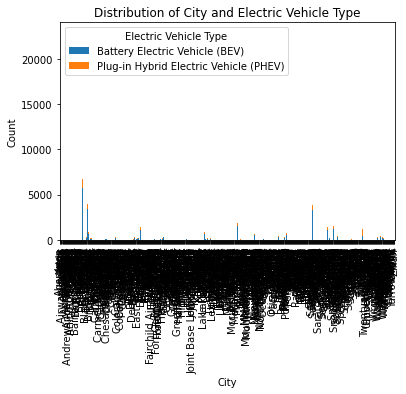

In [13]:
# Draw plots to show the distribution between city and electric vehicle type
plt.figure(figsize=(30, 12))
city_ev_type_counts = df.groupby(['City', 'Electric Vehicle Type']).size().unstack()
city_ev_type_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of City and Electric Vehicle Type')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Electric Vehicle Type')
plt.show()